<a href="https://colab.research.google.com/github/DINESHGITAYE/Digit-Recognizer/blob/main/Digit_recognizer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Dataset:

In [ ]:
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
# Lets plot one number:

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

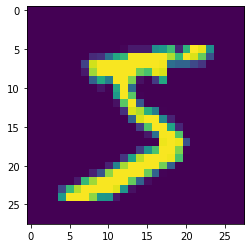

In [ ]:
# lets see this image:
plt.imshow(X_train[0])

In [ ]:
# Actual label of above image:
y_train[0]

5

In [ ]:
# Reshape each image to 28 x 28 and convert these images to gray scale:

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# make 10 categories for target variable y.

y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# CNN Model:


## Model 1:
Activation function: Relu with 32 nodes.

In [ ]:
model_1 = Sequential()

# Convolution layer:
model_1.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
model_1.add(Conv2D(16, kernel_size = 3, activation = 'relu'))

#Flatten:
model_1.add(Flatten())

# Output layer:
model_1.add(Dense(units = 10, activation = 'softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_1.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2905 - accuracy: 0.9426 - val_loss: 0.1034 - val_accuracy: 0.9695
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0805 - accuracy: 0.9760 - val_loss: 0.1182 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0566 - accuracy: 0.9817 - val_loss: 0.0818 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0817 - val_accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.1011 - val_accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.1440 - val_accuracy: 0.9720
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.1311 - val_accuracy:

The predicton accuracy of this model is 99.54%

Now we increase the number of nodes to 64 and then check the accuracy of this model.

In [ ]:
model_1 = Sequential()

# Convolution layer:
model_1.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = [28, 28, 1]))
model_1.add(Conv2D(32, kernel_size = 3, activation = 'relu'))

#Flatten:
model_1.add(Flatten())

# Output layer:
model_1.add(Dense(units = 10, activation = 'softmax'))

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_1.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2390 - accuracy: 0.9495 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0706 - accuracy: 0.9780 - val_loss: 0.0710 - val_accuracy: 0.9779
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0783 - val_accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0962 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0952 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.1470 - val_accuracy: 0.9718
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.1387 - val_accuracy:

The prediction acuuracy of this model is 99.54% which is same as previous model.

## Model 2:
Activation function: Leaky Relu

In [ ]:
lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

[Referance](https://stackoverflow.com/questions/48828478/how-do-you-use-keras-leakyrelu-in-python/48828561)

In [ ]:
model_2 = Sequential()

# Convolution layer:
model_2.add(Conv2D(32, kernel_size = 3, activation= lrelu , input_shape = [28, 28, 1]))
model_2.add(Conv2D(16, kernel_size = 3, activation= lrelu))

#Flatten:
model_2.add(Flatten())

# Output layer:
model_2.add(Dense(units = 10, activation = 'softmax'))

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3081 - accuracy: 0.9409 - val_loss: 0.1503 - val_accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1160 - accuracy: 0.9702 - val_loss: 0.1086 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9750 - val_loss: 0.1529 - val_accuracy: 0.9640
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1036 - accuracy: 0.9765 - val_loss: 0.2091 - val_accuracy: 0.9581
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0956 - accuracy: 0.9800 - val_loss: 0.1678 - val_accuracy: 0.9711
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0841 - accuracy: 0.9827 - val_loss: 0.1345 - val_accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0908 - accuracy: 0.9832 - val_loss: 0.1960 - val_accuracy:

The prediction accuracy of this model is 98.72% which is less than the 1st model.

Now we increase the nodes and check whether we get better accuracy or not.

In [ ]:
model_2 = Sequential()

# Convolution layer:
model_2.add(Conv2D(64, kernel_size = 3, activation= lrelu , input_shape = [28, 28, 1]))
model_2.add(Conv2D(32, kernel_size = 3, activation= lrelu))

#Flatten:
model_2.add(Flatten())

# Output layer:
model_2.add(Dense(units = 10, activation = 'softmax'))

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3468 - accuracy: 0.9394 - val_loss: 0.1162 - val_accuracy: 0.9703
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1645 - accuracy: 0.9656 - val_loss: 0.1706 - val_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1550 - accuracy: 0.9708 - val_loss: 0.2140 - val_accuracy: 0.9615
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1921 - accuracy: 0.9718 - val_loss: 0.3128 - val_accuracy: 0.9686
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1966 - accuracy: 0.9768 - val_loss: 0.2822 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1998 - accuracy: 0.9799 - val_loss: 0.2734 - val_accuracy: 0.9755
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1847 - accuracy: 0.9834 - val_loss: 0.3982 - val_accuracy:

The prediction accuracy of this model increase slightly after increment in nodes.

## Model 3:
Activation function: Elu

[Referance](https://stackoverflow.com/questions/56184666/how-to-set-alpha-parameter-in-activationelu-layer)

In [ ]:
from keras.activations import elu

ELU = lambda x: elu(x, alpha=0.4)

In [ ]:
model_3 = Sequential()

# Convolution layer:
model_3.add(Conv2D(32, kernel_size = 3, activation= ELU , input_shape = [28, 28, 1]))
model_3.add(Conv2D(16, kernel_size = 3, activation= ELU))

#Flatten:
model_3.add(Flatten())

# Output layer:
model_3.add(Dense(units = 10, activation = 'softmax'))

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_3.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3232 - accuracy: 0.9401 - val_loss: 0.1069 - val_accuracy: 0.9694
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0970 - accuracy: 0.9736 - val_loss: 0.1146 - val_accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9792 - val_loss: 0.1394 - val_accuracy: 0.9664
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9824 - val_loss: 0.1584 - val_accuracy: 0.9715
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0627 - accuracy: 0.9856 - val_loss: 0.1715 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9881 - val_loss: 0.1727 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9899 - val_loss: 0.1893 - val_accuracy:

The prediction accuracy of this model is 99.30%

In [ ]:
model_3 = Sequential()

# Convolution layer:
model_3.add(Conv2D(64, kernel_size = 3, activation= ELU , input_shape = [28, 28, 1]))
model_3.add(Conv2D(32, kernel_size = 3, activation= ELU))

#Flatten:
model_3.add(Flatten())

# Output layer:
model_3.add(Dense(units = 10, activation = 'softmax'))

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_3.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2706 - accuracy: 0.9458 - val_loss: 0.1395 - val_accuracy: 0.9630
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1402 - accuracy: 0.9711 - val_loss: 0.1648 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1379 - accuracy: 0.9768 - val_loss: 0.1935 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1371 - accuracy: 0.9811 - val_loss: 0.3377 - val_accuracy: 0.9680
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1230 - accuracy: 0.9853 - val_loss: 0.2847 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1145 - accuracy: 0.9880 - val_loss: 0.3670 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0940 - accuracy: 0.9903 - val_loss: 0.5360 - val_accuracy:

The prediction accuracy of this model is 99.38%

# Keras Tuner:
[Referance](https://keras-team.github.io/keras-tuner/)

###  1. Using Relu actication function

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = 'relu',
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = 'relu'
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = 'relu'
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model
  

In [ ]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 6.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=9e7150c9e85be98d908878f14ad2ef879f3b72e456d55e637a195a4a1c0b88df
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=463302c092ccdf40f971a4e67c735fd6284cd8e579743dbeb3fa41cc914a232e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials = 5, 
                     directory = 'output', project_name = 'DR')

INFO:tensorflow:Reloading Oracle from existing project output/DR/oracle.json
INFO:tensorflow:Reloading Tuner from output/DR/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs = 3, validation_split = 0.1)

INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model_1 = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 62)        49662     
_________________________________________________________________
flatten (Flatten)            (None, 30008)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2760828   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,811,740
Trainable params: 2,811,740
Non-trainable params: 0
_________________________________________________________________


 **Now we apply this model to our train data and then see the accuracy of this best model**

In [ ]:
history_1 = best_model_1.fit(X_train, y_train, epochs = 10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2542 - accuracy: 0.9382 - val_loss: 0.2150 - val_accuracy: 0.9488
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2533 - accuracy: 0.9393 - val_loss: 0.2489 - val_accuracy: 0.9438
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.9412 - val_loss: 0.4377 - val_accuracy: 0.9272
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3028 - accuracy: 0.9363 - val_loss: 0.3352 - val_accuracy: 0.9385
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9430 - val_loss: 0.2568 - val_accuracy: 0.9535
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2949 - accuracy: 0.9406 - val_loss: 0.4972 - val_accuracy: 0.9372
Epoch 10/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4328 - accuracy: 0.9191 - val_loss: 0.4837 - val_accuracy

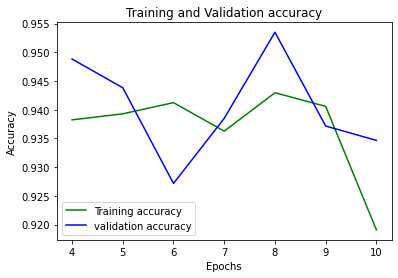

In [ ]:
train_acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
epochs = range(4, 11)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction = best_model_1.predict(X_test)

In [ ]:
prediction

array([[0.0000000e+00, 0.0000000e+00, 8.3624742e-34, ..., 1.0000000e+00,
        1.6398861e-34, 1.6770079e-27],
       [9.8893999e-27, 2.0119130e-36, 1.0000000e+00, ..., 0.0000000e+00,
        7.3279524e-36, 0.0000000e+00],
       [1.8173252e-16, 1.0000000e+00, 3.1550932e-21, ..., 1.7208134e-15,
        1.0990102e-15, 8.8564950e-25],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4223900e-29,
        1.4697564e-24, 2.0677000e-22],
       [4.5411110e-31, 1.1061008e-31, 1.4272364e-29, ..., 0.0000000e+00,
        1.1296462e-11, 1.0443052e-27],
       [1.6824693e-17, 7.7151456e-24, 1.0634448e-27, ..., 5.9967339e-28,
        6.7069297e-22, 9.4212593e-24]], dtype=float32)

In [ ]:
print(np.argmax(prediction[0]))

7


our model predicts that, the 1st number in dataset is 7

lets see the label of this image in y_test

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

So prediction of our model is correct.

### 2. Using Leaky relu activation function

In [ ]:
lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.1)

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = lrelu,
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = lrelu
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = lrelu
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_1 = RandomSearch(build_model, objective='val_accuracy', max_trials = 5)

tuner_1.search(X_train, y_train, epochs = 3, validation_split = 0.1)

best_model_2 = tuner.get_best_models(num_models=1)[0]

best_model_2.summary()

Trial 5 Complete [00h 00m 18s]
val_accuracy: 0.9570000171661377

Best val_accuracy So Far: 0.9800000190734863
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 62)        49662     
_________________________________________________________________
flatten (Flatten)            (None, 30008)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2760828   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,811,740
Trainable params: 2,811,740
Non-trainable params: 

In [ ]:
history_2 = best_model_2.fit(X_train, y_train, epochs = 10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4693 - accuracy: 0.9045 - val_loss: 0.5948 - val_accuracy: 0.9037
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4189 - accuracy: 0.9122 - val_loss: 0.4298 - val_accuracy: 0.9228
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3188 - accuracy: 0.9330 - val_loss: 0.4172 - val_accuracy: 0.8952
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5856 - accuracy: 0.8714 - val_loss: 0.4493 - val_accuracy: 0.8790
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4671 - accuracy: 0.8943 - val_loss: 0.5315 - val_accuracy: 0.9185
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4498 - accuracy: 0.9045 - val_loss: 0.3666 - val_accuracy: 0.9218
Epoch 10/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4993 - accuracy: 0.8814 - val_loss: 0.4012 - val_accuracy

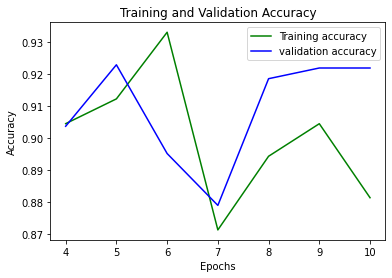

In [ ]:
train_acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
epochs = range(4, 11)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction

In [ ]:
prediction_lrelu = best_model_2.predict(X_test)
print(np.argmax(prediction_lrelu[0]))
print(y_test[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 3. Using Prelu activation function:

In [ ]:
from keras.activations import elu

ELU = lambda x: elu(x, alpha=0.4)

In [ ]:
import keras

def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_1', min_value = 32, max_value = 100, step = 10),
                                kernel_size = hp.Choice('kernel_1', values = [3, 5]),
                                activation = ELU,
                                input_shape = (28, 28, 1)
                            ),
                            keras.layers.Conv2D(
                                filters = hp.Int('filter_2', min_value = 32, max_value = 64, step = 10),
                                kernel_size = hp.Choice('kernel_2', values = [3, 5]),
                                activation = ELU
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units = hp.Int('dense_1', min_value = 32, max_value = 100, step = 10),
                                activation = ELU
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('lerning_rate', values = [1e-2, 1e-3])),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner_3 = RandomSearch(build_model, objective='val_accuracy', max_trials = 5)

tuner_3.search(X_train, y_train, epochs = 3, validation_split = 0.1)

best_model_3 = tuner.get_best_models(num_models=1)[0]

best_model_3.summary()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 62)        49662     
_________________________________________________________________
flatten (Flatten)            (None, 30008)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2760828   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,811,740
Trainable params: 2,811,740
Non-traina

In [ ]:
history_3 = best_model_3.fit(X_train, y_train, epochs = 10, validation_split = 0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4161 - accuracy: 0.9178 - val_loss: 0.4823 - val_accuracy: 0.8922
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3946 - accuracy: 0.9206 - val_loss: 0.4311 - val_accuracy: 0.9352
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3787 - accuracy: 0.9269 - val_loss: 0.7210 - val_accuracy: 0.9267
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4051 - accuracy: 0.9181 - val_loss: 0.6633 - val_accuracy: 0.9147
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4895 - accuracy: 0.8957 - val_loss: 1.5956 - val_accuracy: 0.9105
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6523 - accuracy: 0.8586 - val_loss: 0.8450 - val_accuracy: 0.9060
Epoch 10/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.6243 - accuracy: 0.8623 - val_loss: 0.8633 - val_accuracy

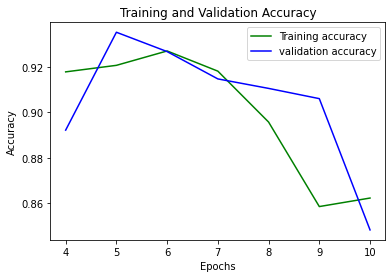

In [ ]:
train_acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
epochs = range(4, 11)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Prediction:

In [ ]:
prediction_Prelu = best_model_3.predict(X_test)
print(np.argmax(prediction_Prelu[0]))
print(y_test[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
